<a href="https://colab.research.google.com/github/ArivalaganRaghavan/Digital-Advertising-Performance-Time-Series-Forecasting/blob/main/Digital_Advertising_Performance_%26_Time_Series_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Ads and Marketing time Series Analysis**

Ads and Marketing is an ads and marketing based company helping businesses elicit maximum clicks @ minimum cost. Ads and Marketing is an ad infrastructure to help businesses promote themselves easily, effectively, and economically. The interplay of 3 AI modules - Design, Dispense, and Decipher, come together to make it this an end-to-end 3 step process digital advertising solution for all.

You are working in the Data Science team of Ads and Marketing trying to understand the per page view report for different wikipedia pages for 550 days, and forecasting the number of views so that you can predict and optimize the ad placement for your clients. You are provided with the data of 145k wikipedia pages and daily view count for each of them.

**Objective:** Our clients belong to different regions and we need data on how their ads will perform on pages in different languages.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_percentage_error

# Load data
df = pd.read_csv('train_1.csv')
exog_campaign = pd.read_csv('Exog_Campaign_eng.csv')

# Display the first few rows of the dataset
print(df.head())


                                                Page  2015-07-01  2015-07-02  \
0            2NE1_zh.wikipedia.org_all-access_spider        18.0        11.0   
1             2PM_zh.wikipedia.org_all-access_spider        11.0        14.0   
2              3C_zh.wikipedia.org_all-access_spider         1.0         0.0   
3         4minute_zh.wikipedia.org_all-access_spider        35.0        13.0   
4  52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...         NaN         NaN   

   2015-07-03  2015-07-04  2015-07-05  2015-07-06  2015-07-07  2015-07-08  \
0         5.0        13.0        14.0         9.0         9.0        22.0   
1        15.0        18.0        11.0        13.0        22.0        11.0   
2         1.0         1.0         0.0         4.0         0.0         3.0   
3        10.0        94.0         4.0        26.0        14.0         9.0   
4         NaN         NaN         NaN         NaN         NaN         NaN   

   2015-07-09  ...  2016-12-22  2016-12-23  2016-12-24  

In [ ]:
# Check for missing values
missing_values = df.isnull().sum().sum()
print(f'Total missing values: {missing_values}')


Total missing values: 6192931


In [ ]:
df.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [ ]:
df.shape

(145063, 551)

In [ ]:
df.ndim

2

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 551 entries, Page to 2016-12-31
dtypes: float64(550), object(1)
memory usage: 609.8+ MB
None


In [ ]:
# check for missing values
missing_values = df.isnull().sum()

In [ ]:
# display the missing values
print(missing_values)

Page              0
2015-07-01    20740
2015-07-02    20816
2015-07-03    20544
2015-07-04    20654
              ...  
2016-12-27     3701
2016-12-28     3822
2016-12-29     3826
2016-12-30     3635
2016-12-31     3465
Length: 551, dtype: int64


In [ ]:
# Splitting the page names to extract relevant information
df['PageName'] = df['Page'].str.split('_').str[0]
df['Language'] = df['Page'].str.split('_').str[1].str.split('.').str[0]
df['AccessType'] = df['Page'].str.split('_').str[2]
df['AccessOrigin'] = df['Page'].str.split('_').str[3]

# Drop the original Page column
df.drop(columns=['Page'], inplace=True)


In [ ]:
df.head()

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,PageName,Language,AccessType,AccessOrigin
0,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,24.0,...,14.0,20.0,22.0,19.0,18.0,20.0,2NE1,zh,all-access,spider
1,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,4.0,...,9.0,30.0,52.0,45.0,26.0,20.0,2PM,zh,all-access,spider
2,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,4.0,...,4.0,4.0,6.0,3.0,4.0,17.0,3C,zh,all-access,spider
3,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,16.0,...,16.0,11.0,17.0,19.0,10.0,11.0,4minute,zh,all-access,spider
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,11.0,27.0,13.0,36.0,10.0,52,Hz,I,Love


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 554 entries, 2015-07-01 to AccessOrigin
dtypes: float64(550), object(4)
memory usage: 613.1+ MB


In [ ]:
df.shape

(145063, 554)

In [ ]:
# Convert wide format to long format
df_long = pd.melt(df, id_vars=['PageName', 'Language', 'AccessType', 'AccessOrigin'], var_name='Date', value_name='Views')

# Convert Date column to datetime format
df_long['Date'] = pd.to_datetime(df_long['Date'])

# Display the long format dataframe
print(df_long.head())


  PageName Language  AccessType AccessOrigin       Date  Views
0     2NE1       zh  all-access       spider 2015-07-01   18.0
1      2PM       zh  all-access       spider 2015-07-01   11.0
2       3C       zh  all-access       spider 2015-07-01    1.0
3  4minute       zh  all-access       spider 2015-07-01   35.0
4       52       Hz           I         Love 2015-07-01    NaN


In [ ]:
df_long.shape

(79784650, 6)

In [ ]:
df_long.head()

,PageName,Language,AccessType,AccessOrigin,Date,Views
0,2NE1,zh,all-access,spider,2015-07-01,18.0
1,2PM,zh,all-access,spider,2015-07-01,11.0
2,3C,zh,all-access,spider,2015-07-01,1.0
3,4minute,zh,all-access,spider,2015-07-01,35.0
4,52,Hz,I,Love,2015-07-01,NaN


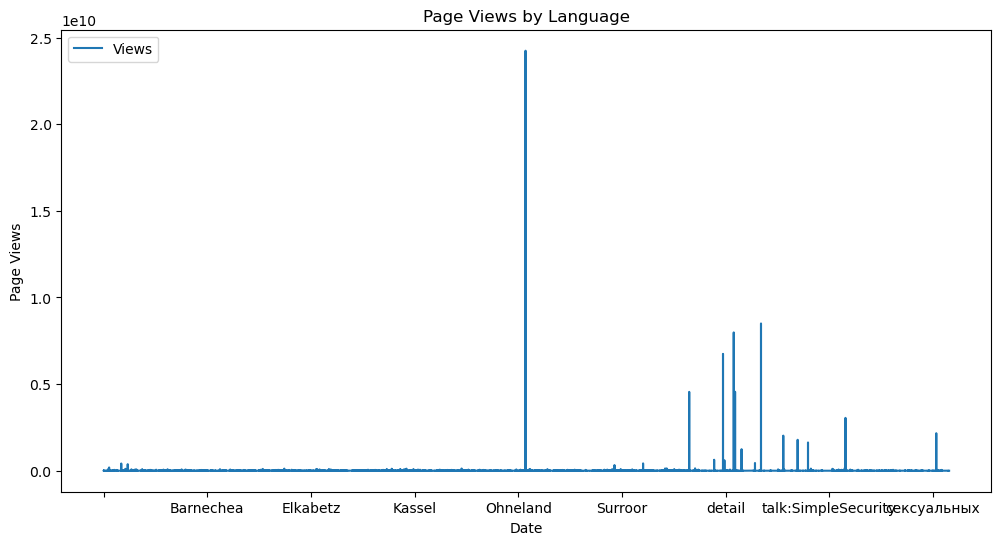

In [ ]:
# Aggregating data by language and plotting
lang_agg = df_long.groupby('Language')['Views'].sum()
plt.figure(figsize=(12, 6))
lang_agg.plot()
plt.title('Page Views by Language')
plt.xlabel('Date')
plt.ylabel('Page Views')
plt.legend(loc='upper left')
plt.show()

In [ ]:
# Assuming you already have 'lang_agg' as the aggregated data
top_20_languages = lang_agg.sort_values(ascending=False).head(20)
print(top_20_languages)


Language
Page         2.424388e+10
ja           8.500028e+09
en           7.982873e+09
de           6.744279e+09
es           4.557585e+09
a            4.551385e+09
zh           3.050059e+09
страница     2.164993e+09
of           2.024796e+09
principal    1.785683e+09
ru           1.630508e+09
fr           1.243653e+09
commons      6.328472e+08
des          6.048828e+08
in           4.466267e+08
Trump        4.234175e+08
(TV          4.160427e+08
(film)       3.774934e+08
States       3.268105e+08
(2016        1.880356e+08
Name: Views, dtype: float64


In [ ]:
top_20_languages = df_long.groupby('Language')['Views'].sum().nlargest(20)
print(top_20_languages)


Language
Page         2.424388e+10
ja           8.500028e+09
en           7.982873e+09
de           6.744279e+09
es           4.557585e+09
a            4.551385e+09
zh           3.050059e+09
страница     2.164993e+09
of           2.024796e+09
principal    1.785683e+09
ru           1.630508e+09
fr           1.243653e+09
commons      6.328472e+08
des          6.048828e+08
in           4.466267e+08
Trump        4.234175e+08
(TV          4.160427e+08
(film)       3.774934e+08
States       3.268105e+08
(2016        1.880356e+08
Name: Views, dtype: float64


We could see japan has the highest number of views followed by English, Ducth and then spanish

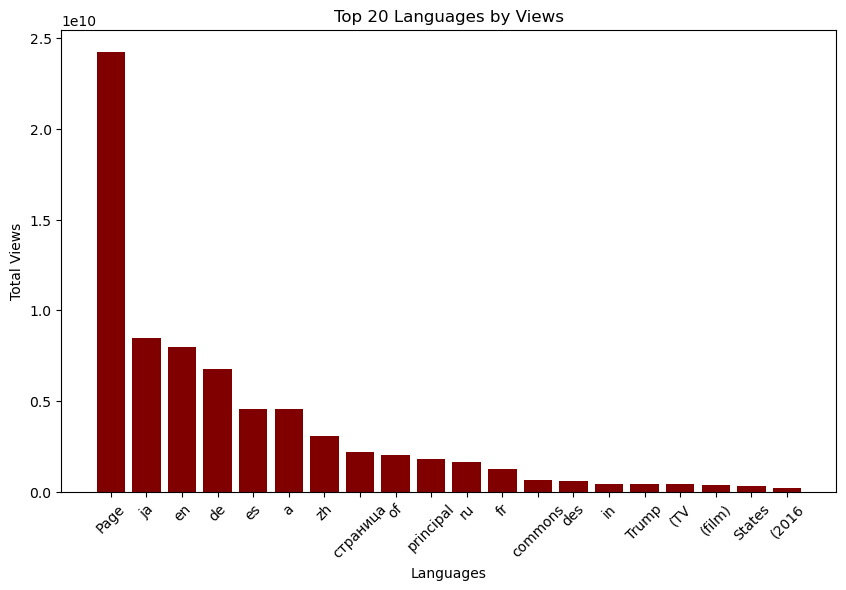

In [ ]:
import matplotlib.pyplot as plt

# Assuming you already have 'top_20_languages' as the aggregated data
plt.figure(figsize=(10, 6))
plt.bar(top_20_languages.index, top_20_languages.values, color='maroon')
plt.xlabel("Languages")
plt.ylabel("Total Views")
plt.title("Top 20 Languages by Views")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


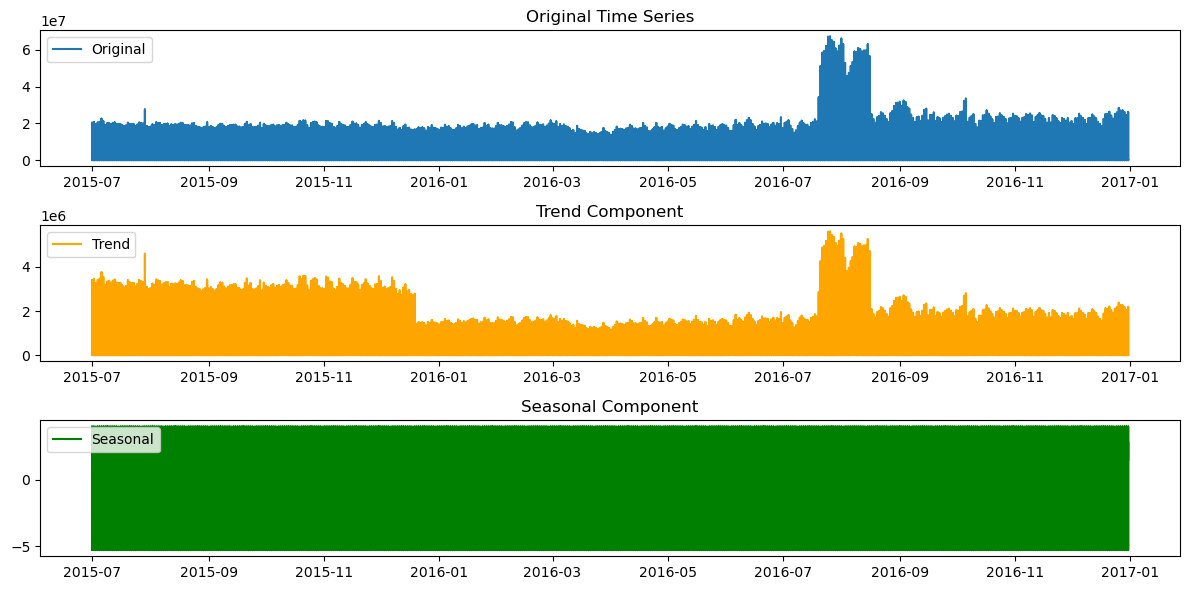

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming you have a DataFrame 'df_long' with columns 'Date' and 'Views'
# Convert 'Date' column to datetime format
df_long['Date'] = pd.to_datetime(df_long['Date'])

# Create a separate DataFrame for trend and seasonality analysis
ts_data = df_long[['Date', 'Views']].copy()

# Set 'Date' as the index
ts_data.set_index('Date', inplace=True)

# Decompose the time series
decomposition = seasonal_decompose(ts_data['Views'], model='additive',period = 12)

# Extract components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the components (optional)
plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.plot(ts_data['Views'], label='Original')
plt.legend(loc='upper left')
plt.title('Original Time Series')

plt.subplot(3, 1, 2)
plt.plot(trend, label='Trend', color='orange')
plt.legend(loc='upper left')
plt.title('Trend Component')

plt.subplot(3, 1, 3)
plt.plot(seasonal, label='Seasonal', color='green')
plt.legend(loc='upper left')
plt.title('Seasonal Component')

plt.tight_layout()
plt.show()


In [ ]:
print(f"Number of days in date columns: {df_long['Date'].nunique()}")

Number of days in date columns: 550


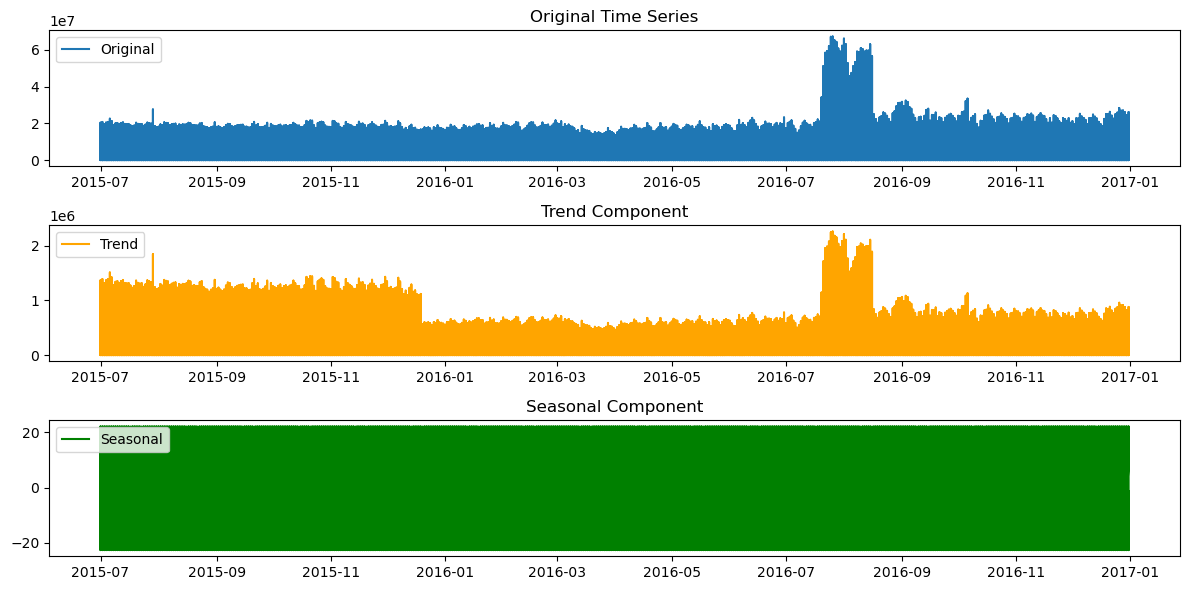

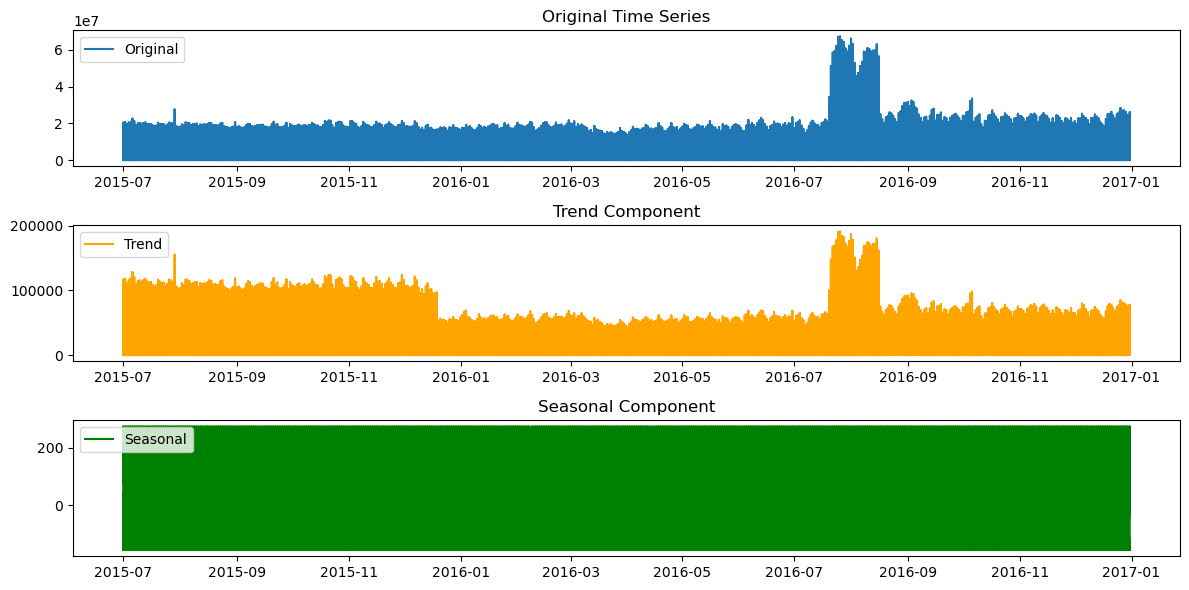

In [ ]:
for p in [30, 365]:
    # Decompose the time series
    decomposition = seasonal_decompose(ts_data['Views'], model='additive',period = p)

    # Extract components
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

    # Plot the components (optional)
    plt.figure(figsize=(12, 6))
    plt.subplot(3, 1, 1)
    plt.plot(ts_data['Views'], label='Original')
    plt.legend(loc='upper left')
    plt.title('Original Time Series')

    plt.subplot(3, 1, 2)
    plt.plot(trend, label='Trend', color='orange')
    plt.legend(loc='upper left')
    plt.title('Trend Component')

    plt.subplot(3, 1, 3)
    plt.plot(seasonal, label='Seasonal', color='green')
    plt.legend(loc='upper left')
    plt.title('Seasonal Component')

    plt.tight_layout()
    plt.show()


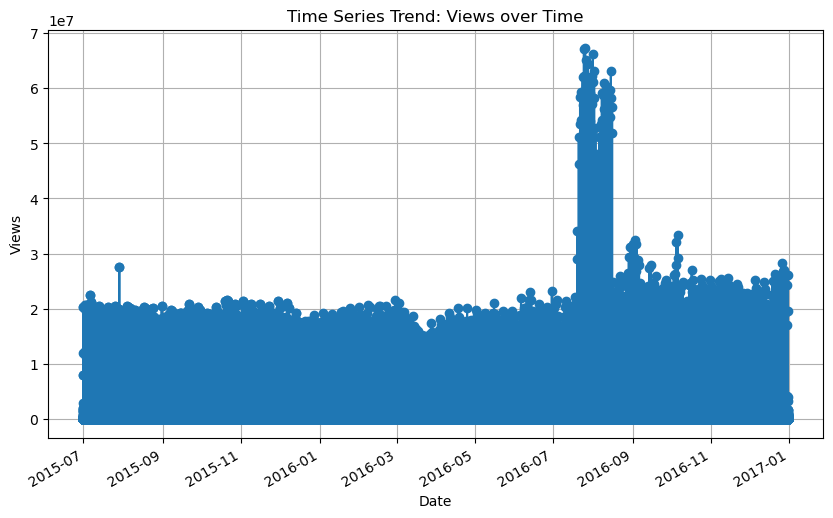

In [ ]:

plt.figure(figsize=(10, 6))
ts_data.Views.plot(style='-o')
plt.xlabel("Date")
plt.ylabel("Views")
plt.title("Time Series Trend: Views over Time")
plt.grid(True)
plt.show()


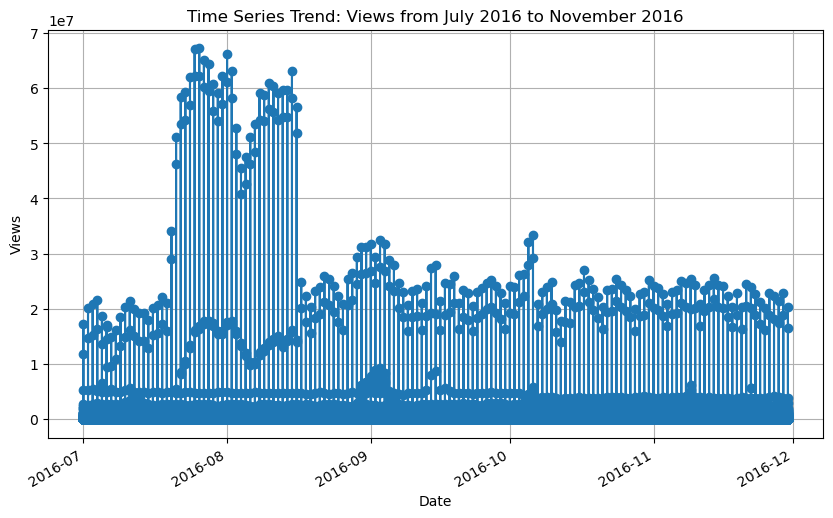

In [ ]:
# Filter data for the specified date range
filtered_data = ts_data['2016-07-01':'2016-11-30']

# Create the line plot
plt.figure(figsize=(10, 6))
filtered_data['Views'].plot(style='-o')
plt.xlabel("Date")
plt.ylabel("Views")
plt.title("Time Series Trend: Views from July 2016 to November 2016")
plt.grid(True)
plt.show()


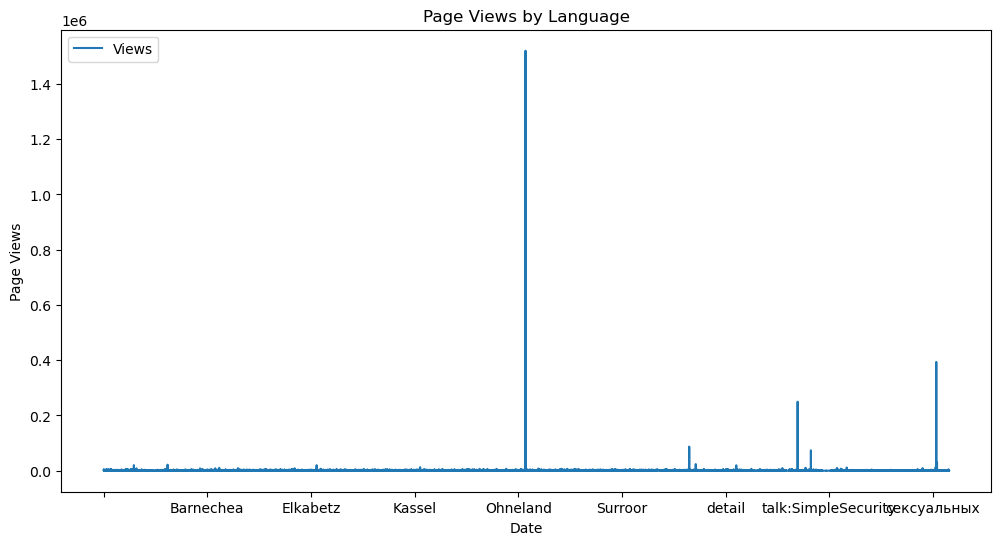

In [ ]:
# Aggregating data by language and plotting
lang_agg_mean = df_long.groupby('Language')['Views'].mean()
plt.figure(figsize=(12, 6))
lang_agg_mean.plot()
plt.title('Page Views by Language')
plt.xlabel('Date')
plt.ylabel('Page Views')
plt.legend(loc='upper left')
plt.show()

In [ ]:

# Group by 'Date' and calculate the mean of 'Views'
mean_views_by_date = df_long.groupby('Date')['Views'].mean()



In [ ]:
# Create a new DataFrame
mean_views_df = pd.DataFrame(mean_views_by_date, columns=['Date','Mean_Views'])

# Display the resulting DataFrame
print(mean_views_df)

Empty DataFrame
Columns: [Date, Mean_Views]
Index: []


In [ ]:
# Assuming you have a DataFrame 'df_long' with columns 'Date' and 'Views'
# Convert 'Date' column to datetime format (if not already done)
df_long['Date'] = pd.to_datetime(df_long['Date'])

# Group by 'Date' and calculate the mean of 'Views'
mean_views_by_date = df_long.groupby('Date')['Views'].mean()

# Create a new DataFrame with a named column
mean_views_df = pd.DataFrame({'Mean_Views': mean_views_by_date})

# Display the resulting DataFrame
print(mean_views_df)


             Mean_Views
Date                   
2015-07-01  1461.285828
2015-07-02  1295.925267
2015-07-03  1222.611617
2015-07-04  1259.592067
2015-07-05  1321.827895
...                 ...
2016-12-27  1658.463674
2016-12-28  1618.572041
2016-12-29  1661.596065
2016-12-30  1446.206972
2016-12-31  1458.625618

[550 rows x 1 columns]


In [ ]:
mean_views_df.index


DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04',
               '2015-07-05', '2015-07-06', '2015-07-07', '2015-07-08',
               '2015-07-09', '2015-07-10',
               ...
               '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25',
               '2016-12-26', '2016-12-27', '2016-12-28', '2016-12-29',
               '2016-12-30', '2016-12-31'],
              dtype='datetime64[ns]', name='Date', length=550, freq=None)

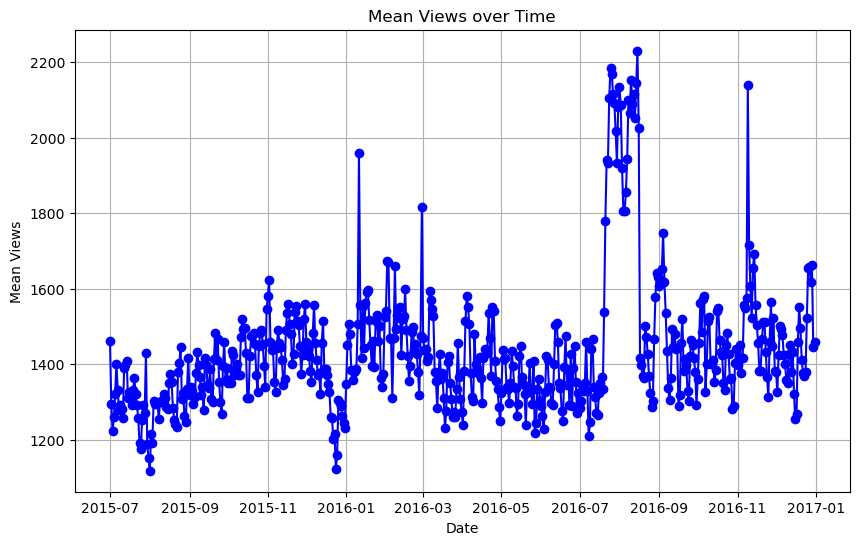

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot_date(mean_views_df.index, mean_views_df['Mean_Views'], linestyle='-', marker='o', color='b')
plt.xlabel("Date")
plt.ylabel("Mean Views")
plt.title("Mean Views over Time")
plt.grid(True)
plt.show()

* Choosing mean will be the ideal option compared to the sum of all the views as the computation for plotting the graphs is lesser compared to the sum of views

In [ ]:
# Group by 'Language' and 'Date', calculating the mean of 'Views'
mean_views_by_language_date = df_long.groupby(['Language', 'Date'])['Views'].mean()

# Create a new DataFrame
mean_views_df = pd.DataFrame(mean_views_by_language_date, columns=['Mean_Views'])

# Display the resulting DataFrame
print(mean_views_df)

Empty DataFrame
Columns: [Mean_Views]
Index: []


In [ ]:
mean_views_by_language_date

Language  Date      
          2015-07-01    122.857143
          2015-07-02    177.571429
          2015-07-03    187.857143
          2015-07-04    122.285714
          2015-07-05    160.142857
                           ...    
～戀愛系列～    2016-12-27    251.250000
          2016-12-28    326.500000
          2016-12-29    309.000000
          2016-12-30    456.250000
          2016-12-31    443.750000
Name: Views, Length: 8972700, dtype: float64

In [ ]:
# Create a new DataFrame with named columns
mean_views_df = pd.DataFrame(mean_views_by_language_date).reset_index()
mean_views_df.rename(columns={'Views': 'Mean_Views'}, inplace=True)

# Display the resulting DataFrame
print(mean_views_df)

        Language       Date  Mean_Views
0                2015-07-01  122.857143
1                2015-07-02  177.571429
2                2015-07-03  187.857143
3                2015-07-04  122.285714
4                2015-07-05  160.142857
...          ...        ...         ...
8972695   ～戀愛系列～ 2016-12-27  251.250000
8972696   ～戀愛系列～ 2016-12-28  326.500000
8972697   ～戀愛系列～ 2016-12-29  309.000000
8972698   ～戀愛系列～ 2016-12-30  456.250000
8972699   ～戀愛系列～ 2016-12-31  443.750000

[8972700 rows x 3 columns]


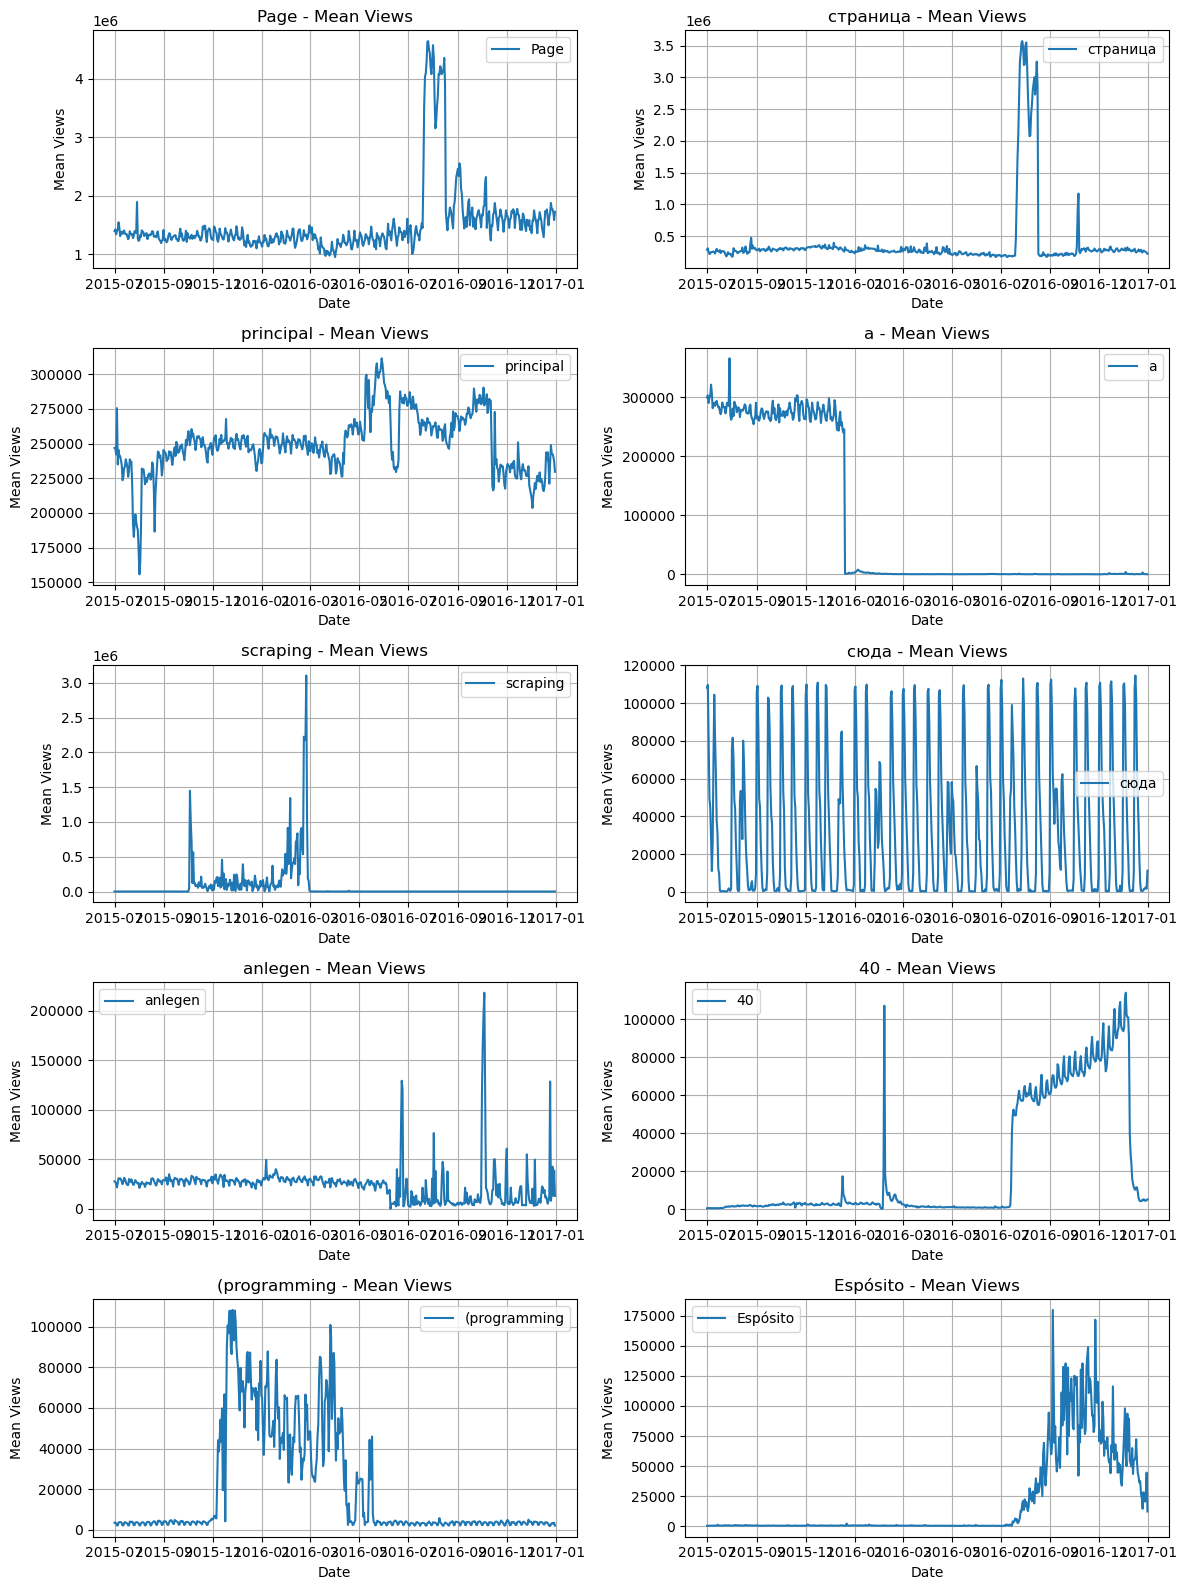

In [ ]:

top_10_languages = mean_views_df.groupby('Language')['Mean_Views'].mean().nlargest(10).index

# Filter the data for the top 10 languages
top_10_df = mean_views_df[mean_views_df['Language'].isin(top_10_languages)]

# Create subplots for each language
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 16))
for i, language in enumerate(top_10_languages):
    ax = axes[i // 2, i % 2]
    language_data = top_10_df[top_10_df['Language'] == language]
    ax.plot(language_data['Date'], language_data['Mean_Views'], label=language)
    ax.set_title(f"{language} - Mean Views")
    ax.set_xlabel("Date")
    ax.set_ylabel("Mean Views")
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()


In [ ]:
top_10_df

,Language,Date,Mean_Views
320650,(programming,2015-07-01,3576.500000
320651,(programming,2015-07-02,3686.750000
320652,(programming,2015-07-03,3101.750000
320653,(programming,2015-07-04,2278.000000
320654,(programming,2015-07-05,2218.250000
...,...,...,...
8843995,сюда,2016-12-27,1649.333333
8843996,сюда,2016-12-28,1678.666667
8843997,сюда,2016-12-29,2331.666667
8843998,сюда,2016-12-30,1580.000000


In [ ]:
english_data

Series([], Name: Mean_Views, dtype: float64)

In [ ]:
for i in ['Name','Language','Access_Type','Access_Origin']:
    print(f"The number of unique values in the column {i}:", df_long[i].nunique())
    print(f"The unique values in the column {i}:", df_long[i].unique())

The number of unique values in the column Name: 29135
The unique values in the column Name: ['2NE1' '2PM' '3C' ... 'Verführt' 'ジャック・リーチャー' 'マイク眞木']
The number of unique values in the column Language: 24215
The unique values in the column Language: ['zh' 'Hz_I_Love_You_zh' 'e-Sports_Club_zh' ... 'Þór_Halldórsson_de'
 '–_In_den_Armen_eines_Anderen_de'
 'Reihe_betrüblicher_Ereignisse_(Fernsehserie)_de']
The number of unique values in the column Access_Type: 3
The unique values in the column Access_Type: ['all-access' 'desktop' nan 'mobile-web']
The number of unique values in the column Access_Origin: 2
The unique values in the column Access_Origin: ['spider' 'all-agents' nan]


In [ ]:
# Instead of filling missing values with zero, considering interpolation
df_long['Views'] = df_long['Views'].interpolate(method='linear')


<Axes: >

In [ ]:
lang_agg = df_long.groupby('Language')['Views'].sum()
df_long['Date'] = pd.to_datetime(df_long['Date'])

# Create a separate DataFrame for trend and seasonality analysis
ts_data = df_long[['Date', 'Views']].copy()

# Set 'Date' as the index
ts_data.set_index('Date', inplace=True)
lang_agg_mean = df_long.groupby('Language')['Views'].mean()

# Group by 'Date' and calculate the mean of 'Views'
mean_views_by_date = df_long.groupby('Date')['Views'].mean()

# Create a new DataFrame with a named column
mean_views_df = pd.DataFrame({'Mean_Views': mean_views_by_date})

# Display the resulting DataFrame
print(mean_views_df)






             Mean_Views
Date                   
2015-07-01  1195.856567
2015-07-02  1204.003638
2015-07-03  1133.675969
2015-07-04  1170.437324
2015-07-05  1217.769300
...                 ...
2016-12-27  1678.301870
2016-12-28  1633.965605
2016-12-29  1684.307717
2016-12-30  1467.943378
2016-12-31  1478.282137

[550 rows x 1 columns]


In [ ]:
# Group by 'Language' and 'Date', calculating the mean of 'Views'
mean_views_by_language_date = df_long.groupby(['Language', 'Date'])['Views'].mean()


# Create a new DataFrame with named columns
mean_views_df = pd.DataFrame(mean_views_by_language_date).reset_index()
mean_views_df.rename(columns={'Views': 'Mean_Views'}, inplace=True)

# Display the resulting DataFrame
print(mean_views_df)

        Language       Date  Mean_Views
0                2015-07-01  122.857143
1                2015-07-02  118.166667
2                2015-07-03  137.166667
3                2015-07-04  122.285714
4                2015-07-05  160.142857
...          ...        ...         ...
8972695   ～戀愛系列～ 2016-12-27  251.250000
8972696   ～戀愛系列～ 2016-12-28  326.500000
8972697   ～戀愛系列～ 2016-12-29  309.000000
8972698   ～戀愛系列～ 2016-12-30  456.250000
8972699   ～戀愛系列～ 2016-12-31  443.750000

[8972700 rows x 3 columns]


ADF Statistic: -2.870971149786742
p-value: 0.048829292183427984
Critical Value (1%): -3.443
Critical Value (5%): -2.867
Critical Value (10%): -2.570


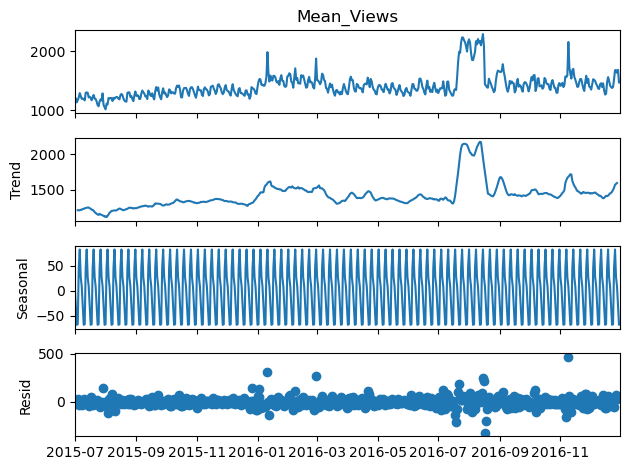

In [ ]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

# Stationarity test
result = adfuller(mean_views_df['Mean_Views'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
for key, value in result[4].items():
    print('Critical Value (%s): %.3f' % (key, value))

# Decomposition
decomposition = seasonal_decompose(mean_views_df['Mean_Views'], model='additive')
decomposition.plot()
plt.show()


The Augmented Dickey-Fuller (ADF) test is commonly used to check for stationarity in time series data. Here’s how to interpret the results:

ADF Statistic: This value represents the test statistic. If it is more negative than the critical values, it suggests that the null hypothesis (the time series is non-stationary) can be rejected. In your case, the ADF Statistic is -2.87.
p-value: The p-value indicates the probability of observing the ADF Statistic under the null hypothesis. If the p-value is less than a chosen significance level (e.g., 0.05), we reject the null hypothesis. Here, the p-value is approximately 0.0488, which is less than 0.05.
Critical Values: These are thresholds for the ADF Statistic at different confidence levels (1%, 5%, and 10%). If the ADF Statistic is more negative than the critical value, we reject the null hypothesis. In your case:
Critical Value (1%): -3.443
Critical Value (5%): -2.867
Critical Value (10%): -2.570
Based on the results, you can conclude that your time series data is likely stationary since the ADF Statistic is more negative than the critical values and the p-value is below the significance level

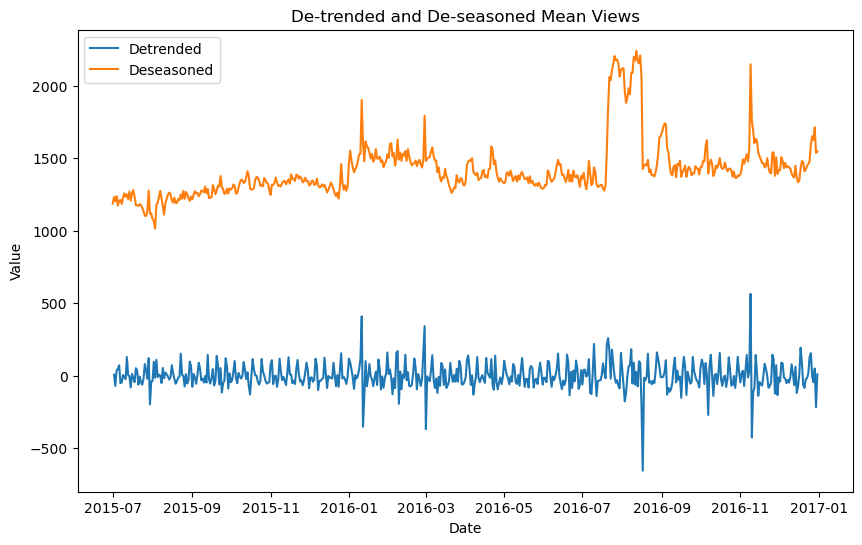

In [ ]:
# De-trending by differencing
mean_views_df['Detrended'] = mean_views_df['Mean_Views'].diff().dropna()

# De-seasoning by removing the seasonal component
seasonal = decomposition.seasonal
mean_views_df['Deseasoned'] = mean_views_df['Mean_Views'] - seasonal

# Plotting the de-trended and de-seasoned data
plt.figure(figsize=(10, 6))
plt.plot(mean_views_df.index, mean_views_df['Detrended'], label='Detrended')
plt.plot(mean_views_df.index, mean_views_df['Deseasoned'], label='Deseasoned')
plt.title('De-trended and De-seasoned Mean Views')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


<Figure size 1000x600 with 0 Axes>

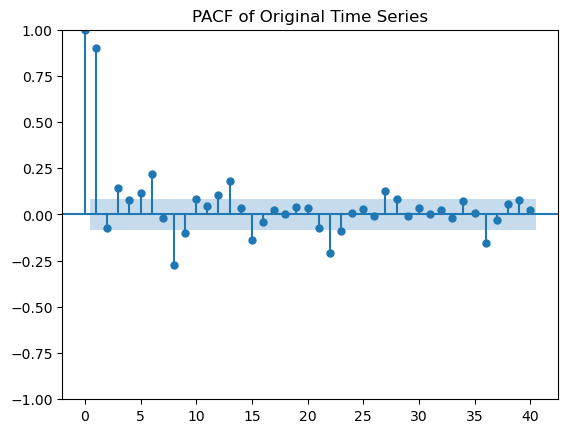

<Figure size 1000x600 with 0 Axes>

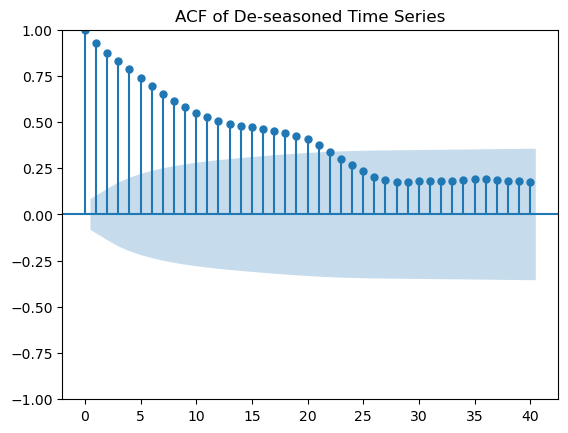

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF and PACF plots for original time series
plt.figure(figsize=(10, 6))
plot_pacf(mean_views_df['Mean_Views'].dropna(), lags=40)
plt.title('PACF of Original Time Series')
plt.show()

# ACF plot for de-trended and de-seasoned time series
plt.figure(figsize=(10, 6))
plot_acf(mean_views_df['Deseasoned'].dropna(), lags=40)
plt.title('ACF of De-seasoned Time Series')
plt.show()


In [ ]:
# Check for missing or infinite values
print(mean_views_df.isna().sum())
print(mean_views_df.isin([np.inf, -np.inf]).sum())

# Remove rows with missing or infinite values
mean_views_df = mean_views_df.replace([np.inf, -np.inf], np.nan)
mean_views_df = mean_views_df.dropna()

# Verify no missing or infinite values remain
print(mean_views_df.isna().sum())
print(mean_views_df.isin([np.inf, -np.inf]).sum())


Language           0
Date               0
Mean_Views    777294
dtype: int64
Language      0
Date          0
Mean_Views    0
dtype: int64
Language      0
Date          0
Mean_Views    0
dtype: int64
Language      0
Date          0
Mean_Views    0
dtype: int64


In [ ]:
mean_views_df.tail()

,Mean_Views,Detrended,Deseasoned
Date,,,
2016-12-27,1678.301870,-1.304683,1651.234454
2016-12-28,1633.965605,-44.336265,1625.226835
2016-12-29,1684.307717,50.342112,1712.157587
2016-12-30,1467.943378,-216.364339,1536.401507
2016-12-31,1478.282137,10.338759,1545.668311


In [ ]:
# Assuming your DataFrame is named 'mean_views_df'
mean_views_df.reset_index(inplace=True)


# Splitting data into train and test sets
train = mean_views_df[mean_views_df['Date'] < '2016-09-13']
test = mean_views_df[mean_views_df['Date'] >= '2016-09-13']


print(f"Shape of the train data :{train.shape}")
print(f"Shape of the test data :{test.shape}")

Shape of the train data :(440, 4)
Shape of the test data :(110, 4)


In [ ]:
from sklearn.metrics import (
    mean_squared_error as mse,
    mean_absolute_error as mae,
    mean_absolute_percentage_error as mape

)

# Creating a function to print values of all these metrics.
def performance(actual, predicted):
    print('MAE :', round(mae(actual, predicted), 3))
    print('RMSE :', round(mse(actual, predicted)**0.5, 3))
    print('MAPE:', round(mape(actual, predicted), 3))

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


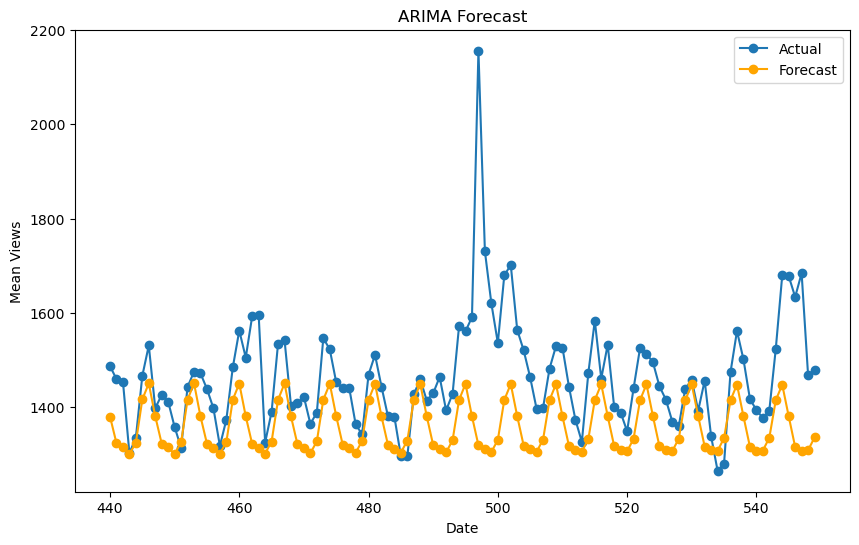

MAE : 109.873
RMSE : 152.885
MAPE: 0.071


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Assuming p, d, q are defined based on ACF/PACF plots
# Assuming p, d, q are defined based on ACF/PACF plots
model = SARIMAX(train['Mean_Views'], order=(5, 1, 5))
model_fit = model.fit(disp=0)

# Forecasting
forecast = model_fit.forecast(steps=len(test))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(test.index, test['Mean_Views'], label='Actual',marker='o')
plt.plot(test.index, forecast, label='Forecast', color='orange',marker='o')
plt.xlabel('Date')
plt.ylabel('Mean Views')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()
performance(test['Mean_Views'],forecast)

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


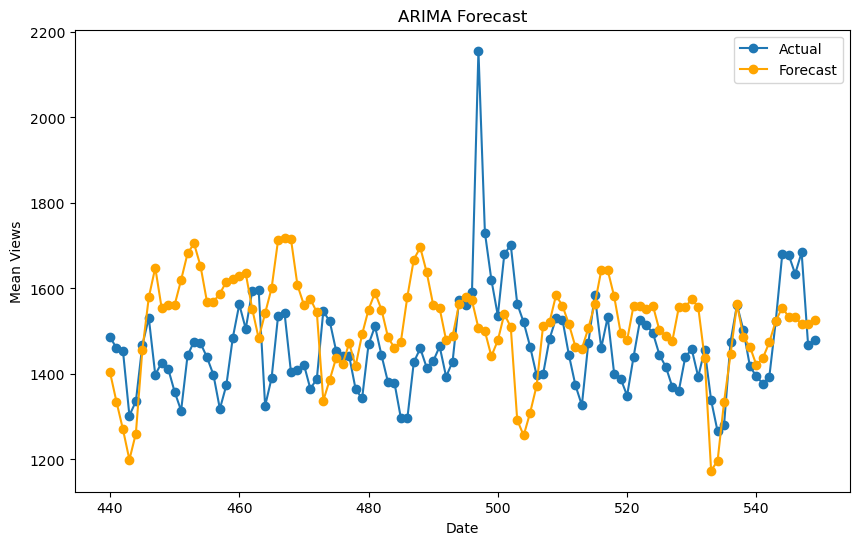

MAE : 125.413
RMSE : 155.483
MAPE: 0.086


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Assuming p, d, q are defined based on ACF/PACF plots
# Assuming p, d, q are defined based on ACF/PACF plots
model = SARIMAX(train['Mean_Views'], order=(3, 1, 3), seasonal_order=(1,1,1,30))
model_fit = model.fit(disp=0)

# Forecasting
forecast = model_fit.forecast(steps=len(test))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(test.index, test['Mean_Views'], label='Actual',marker='o')
plt.plot(test.index, forecast, label='Forecast', color='orange',marker='o')
plt.xlabel('Date')
plt.ylabel('Mean Views')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()
performance(test['Mean_Views'],forecast)

In [ ]:
model = SARIMAX(train['Mean_Views'],seasonal_order=(1,0,1,7))
results = model.fit()
fc = results.forecast(42)

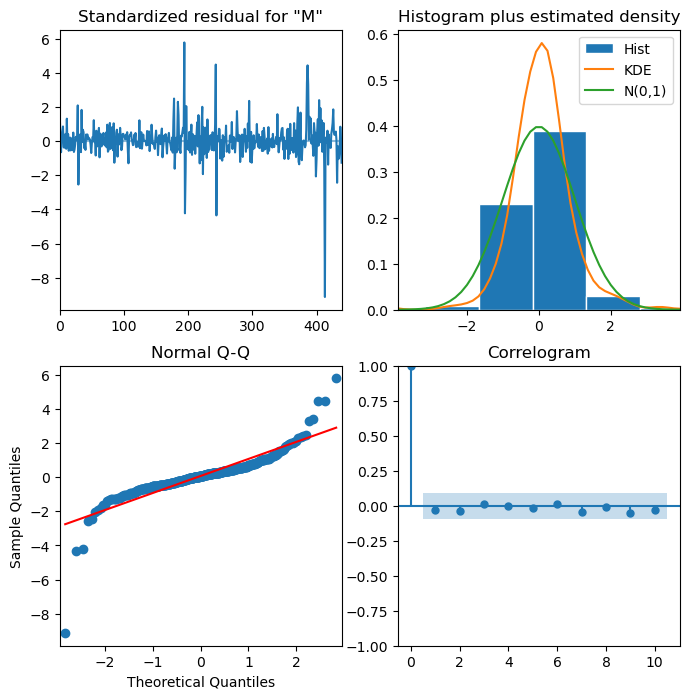

In [ ]:
results.plot_diagnostics(figsize=(8,8));

In [ ]:
# Obtain predicted values
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end)

MAE : 71.847
RMSE : 117.613
MAPE: 0.046


[Text(0.5, 0, 'days'), Text(0, 0.5, 'Visitors per day')]

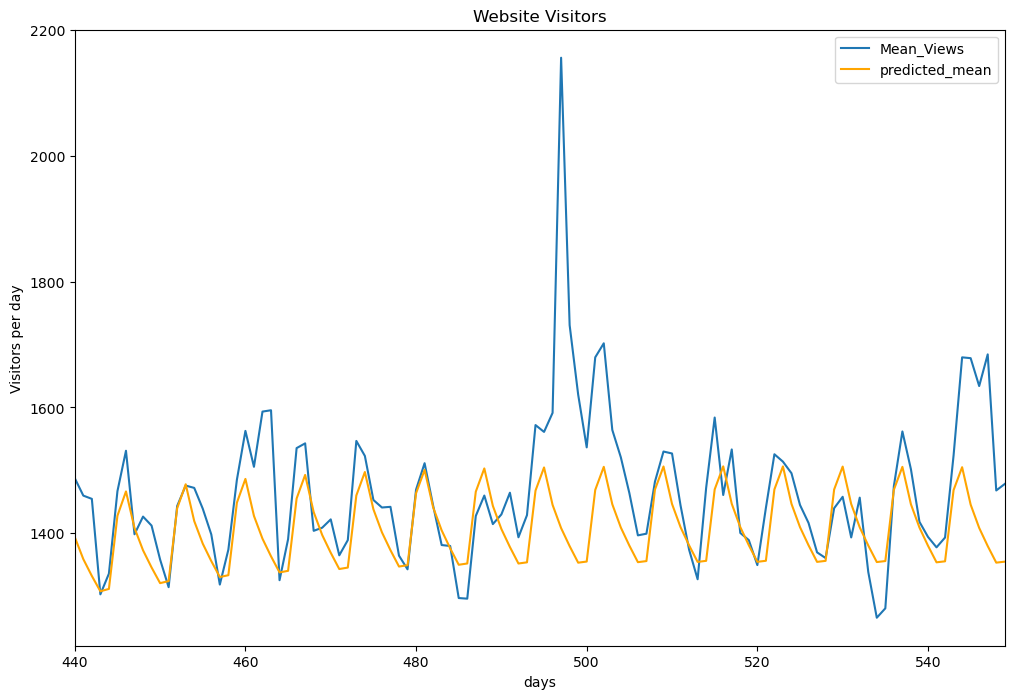

In [ ]:
performance(test['Mean_Views'], predictions)
# Plot predictions against known values
title='Website Visitors'
ylabel='Visitors per day'
xlabel='days'
ax = test['Mean_Views'].plot(legend=True,figsize=(12,8),title=title)
predictions.plot(legend=True,color = 'orange')
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)


In [ ]:
import itertools
import warnings
warnings.filterwarnings("ignore")

# Define the p, d, q parameters to take any value between 0 and 3
p = d = q = range(0, 4)

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, d and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 30) for x in list(itertools.product(p, d, q))]

best_aic = float("inf")
best_params = None

# Perform grid search
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = SARIMAX(train['Mean_Views'], order=param, seasonal_order=param_seasonal)
            results = mod.fit()
            if results.aic < best_aic:
                best_aic = results.aic
                best_params = (param, param_seasonal)
        except:
            continue

print('Best ARIMA{}x{}7 AIC:{}'.format(best_params[0], best_params[1], best_aic))


In [ ]:
!pip install prophet



Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for prophet from https://files.pythonhosted.org/packages/24/2b/834e9a347f2f0161e32a3c6125b8a1ebdf6ac33199a0ed3a0bdf1f0c296f/prophet-1.1.5-py3-none-win_amd64.whl.metadata
  Obtaining dependency information for cmdstanpy>=1.0.4 from https://files.pythonhosted.org/packages/5d/12/6522f3de83ca690aa52f4b8c88a1e203abb1e2d75c31669dc004949143cd/cmdstanpy-1.2.4-py3-none-any.whl.metadata
  Obtaining dependency information for holidays>=0.25 from https://files.pythonhosted.org/packages/69/69/7fa6de3234e94613d42b8c1d23ea87693c53f8706cb4833461538317fc06/holidays-0.53-py3-none-any.whl.metadata
  Using cached holidays-0.53-py3-none-any.whl.metadata (23 kB)
  Obtaining dependency information for importlib-resources from https://files.pythonhosted.org/packages/75/06/4df55e1b7b112d183f65db9503bff189e97179b256e1ea450a3c365241e0/importlib_resources-6.4.0-py3-none-any.whl.metadata
  Obtaining dep

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [ ]:
exog_campaign

,Exog
0,0
1,0
2,0
3,0
4,0
...,...
545,1
546,1
547,1
548,0


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


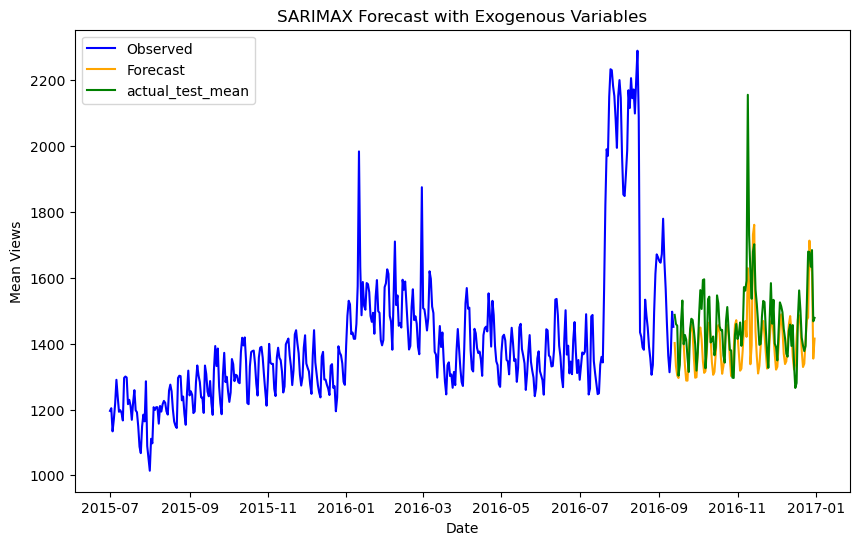

MAE : 73.309
RMSE : 101.443
MAPE: 0.048


In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Specify the order of the SARIMA model (p, d, q, P, D, Q, s)
order = (3, 1, 3)  # Adjust as needed

# Fit the SARIMAX model with exogenous variables
model = sm.tsa.SARIMAX(train['Mean_Views'], exog=exog_campaign.iloc[:440,0], order=order, seasonal_order=(1, 1, 1, 12))
results = model.fit()

# Get predictions (specify the desired forecast steps)
forecast_steps = 12  # Example: 12 steps ahead
forecast = results.predict(440, exog_campaign.shape[0]-1, exog = exog_campaign.iloc[440:,0])

# Plot observed data
plt.figure(figsize=(10, 6))
plt.plot(train['Date'], train['Mean_Views'], label='Observed', color='blue')

forecast1=pd.DataFrame({'Predicted_mean':forecast})

# Plot forecast
plt.plot(test['Date'], forecast1['Predicted_mean'], label='Forecast', color='orange')
plt.plot(test['Date'], test['Mean_Views'], label='actual_test_mean', color='green')

# Add confidence intervals (optional)
#plt.fill_between(test.index, forecast.conf_int()['lower Mean_Views'], forecast.conf_int()['upper Mean_Views'], color='gray', alpha=0.3)

plt.xlabel('Date')
plt.ylabel('Mean Views')
plt.title('SARIMAX Forecast with Exogenous Variables')
plt.legend()
plt.show()
performance(test['Mean_Views'],forecast1['Predicted_mean'])

From the above we can see that the predicted value is almost near the exact value of the actual mean and the error is 4.8 percentage

In [ ]:
from prophet import Prophet

In [ ]:
 mean_views_df[['Date', 'Mean_Views']]

,Date,Mean_Views
0,2015-07-01,1195.856567
1,2015-07-02,1204.003638
2,2015-07-03,1133.675969
3,2015-07-04,1170.437324
4,2015-07-05,1217.769300
...,...,...
545,2016-12-27,1678.301870
546,2016-12-28,1633.965605
547,2016-12-29,1684.307717
548,2016-12-30,1467.943378


C:\Users\ariva\AppData\Local\Temp\ipykernel_29340\1053810278.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prophet.rename(columns={'Date': 'ds', 'Mean_Views': 'y'}, inplace=True)
18:51:19 - cmdstanpy - INFO - Chain [1] start processing
18:51:19 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\ariva\AppData\Roaming\Python\Python311\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\ariva\AppData\Roaming\Python\Python311\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is

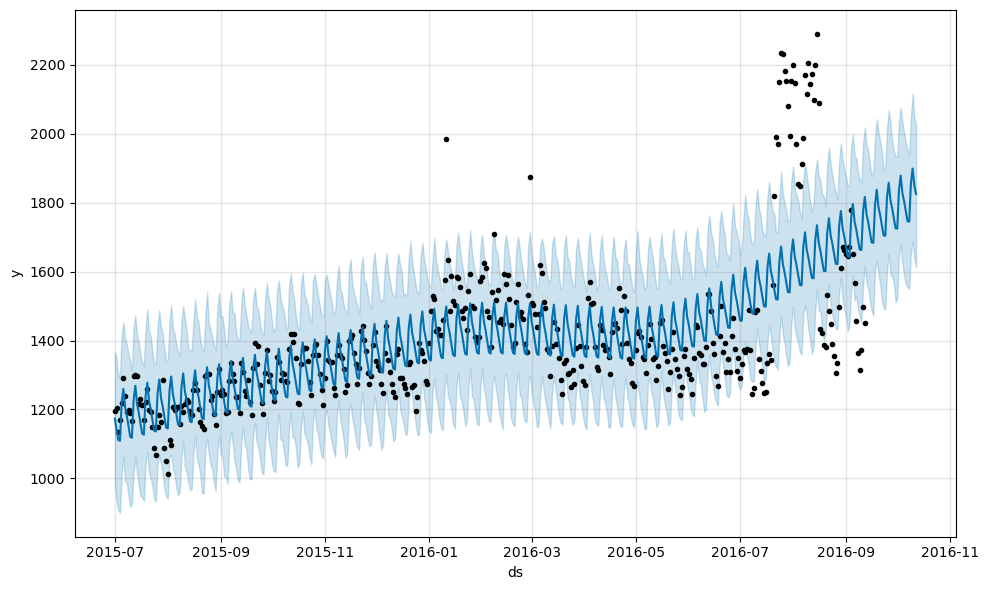

In [ ]:
df_prophet = mean_views_df[['Date', 'Mean_Views']]
df_prophet.rename(columns={'Date': 'ds', 'Mean_Views': 'y'}, inplace=True)
model = Prophet()
model.fit(df_prophet[['ds','y']][:-110])
future = model.make_future_dataframe(periods=30, freq='D')
forecast = model.predict(future)
fig = model.plot(forecast)

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-07-01,1170.764691,977.784517,1366.992889,1170.764691,1170.764691,2.572537,2.572537,2.572537,2.572537,2.572537,2.572537,0.0,0.0,0.0,1173.337227
1,2015-07-02,1172.049385,934.333816,1350.178338,1172.049385,1172.049385,-30.240598,-30.240598,-30.240598,-30.240598,-30.240598,-30.240598,0.0,0.0,0.0,1141.808786
2,2015-07-03,1173.334079,907.751920,1295.295030,1173.334079,1173.334079,-61.644924,-61.644924,-61.644924,-61.644924,-61.644924,-61.644924,0.0,0.0,0.0,1111.689154
3,2015-07-04,1174.618772,900.092717,1305.788393,1174.618772,1174.618772,-65.656640,-65.656640,-65.656640,-65.656640,-65.656640,-65.656640,0.0,0.0,0.0,1108.962132
4,2015-07-05,1175.903466,1015.228272,1415.538002,1175.903466,1175.903466,43.527767,43.527767,43.527767,43.527767,43.527767,43.527767,0.0,0.0,0.0,1219.431233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,2016-10-08,1810.937931,1548.507014,1936.028808,1806.452387,1816.436418,-65.656640,-65.656640,-65.656640,-65.656640,-65.656640,-65.656640,0.0,0.0,0.0,1745.281291
466,2016-10-09,1813.877026,1655.112501,2051.910819,1809.101457,1819.734456,43.527767,43.527767,43.527767,43.527767,43.527767,43.527767,0.0,0.0,0.0,1857.404793
467,2016-10-10,1816.816121,1687.208783,2116.815629,1811.671680,1822.979161,82.527105,82.527105,82.527105,82.527105,82.527105,82.527105,0.0,0.0,0.0,1899.343226
468,2016-10-11,1819.755216,1637.740134,2047.554813,1814.201668,1826.330458,28.914754,28.914754,28.914754,28.914754,28.914754,28.914754,0.0,0.0,0.0,1848.669969


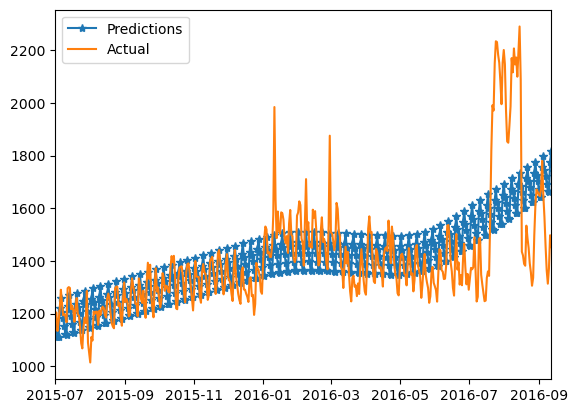

In [ ]:
plt.plot(forecast['ds'], forecast['yhat'],'-*', label = 'Predictions')
plt.plot(df_prophet['ds'], df_prophet['y'], label = 'Actual')
plt.xlim(pd.to_datetime('2015-07-01'), pd.to_datetime('2016-09-12'))
plt.legend()

In [ ]:
performance(df_prophet['y'][:470],forecast['yhat'])

MAE : 116.784
RMSE : 176.05
MAPE: 0.078


In [ ]:
train.head()

,Date,Mean_Views,Detrended,Deseasoned
0,2015-07-01,1195.856567,NaN,1187.117797
1,2015-07-02,1204.003638,8.147071,1231.853508
2,2015-07-03,1133.675969,-70.327669,1202.134099
3,2015-07-04,1170.437324,36.761355,1237.823498
4,2015-07-05,1217.769300,47.331976,1172.337795


In [ ]:
exog_campaign.head()

,Exog
0,0
1,0
2,0
3,0
4,0


In [ ]:
performance(test['Mean_Views'],forecast)

Mean Squared Error: 178827247193853.1


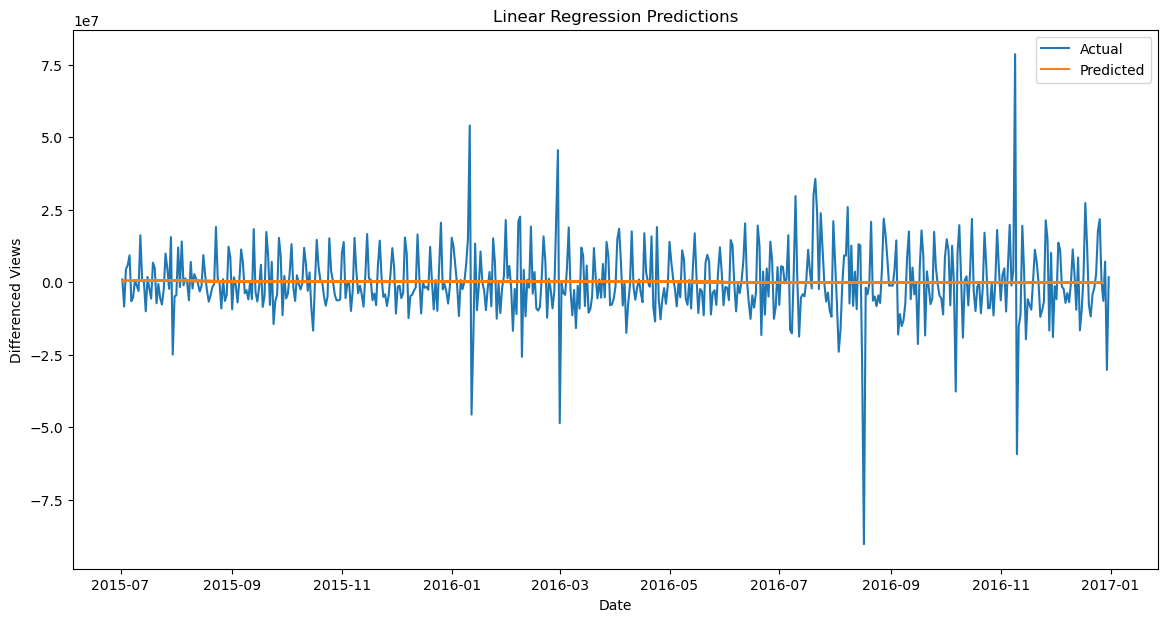

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Example: Simple Linear Regression for forecasting
X = df_daily_views_diff.index.factorize()[0].reshape(-1, 1)  # Factorize dates
y = df_daily_views_diff.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(f'Mean Squared Error: {mean_squared_error(y_test, predictions)}')

# Plot predictions vs actual values
plt.figure(figsize=(14, 7))
plt.plot(df_daily_views_diff.index, df_daily_views_diff.values, label='Actual')
plt.plot(df_daily_views_diff.index[X_test.flatten()], predictions, label='Predicted')
plt.legend()
plt.title('Linear Regression Predictions')
plt.xlabel('Date')
plt.ylabel('Differenced Views')
plt.show()


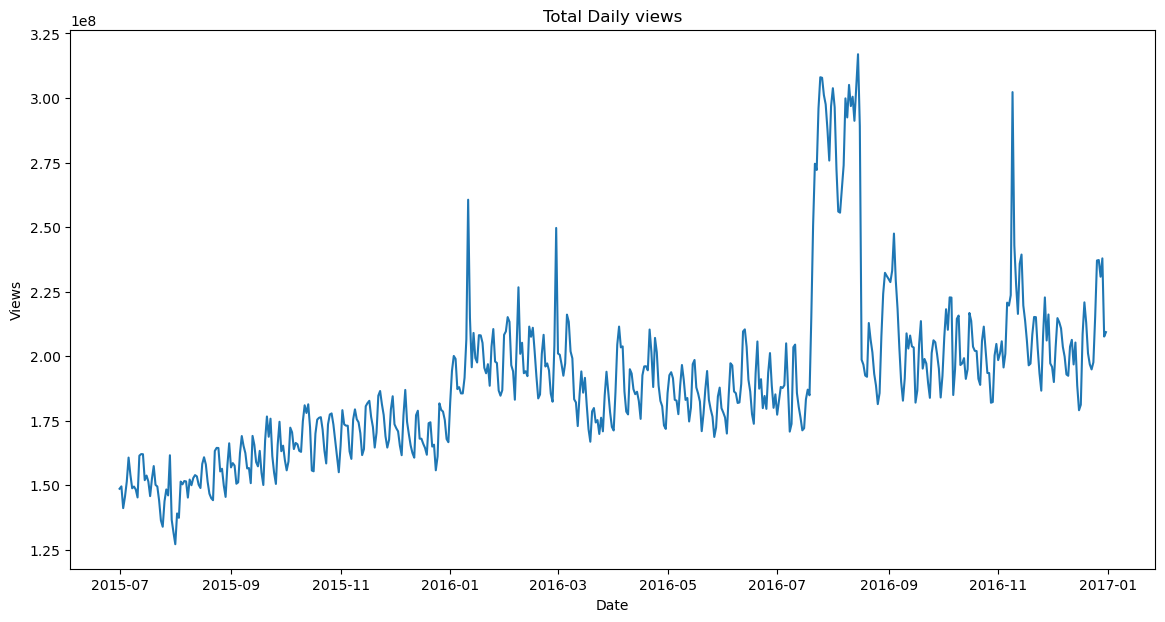

In [ ]:
import matplotlib.pyplot as plt


# Group by date and sum the views for a high-level overview
df_daily_views = df_long.groupby('Date')['Views'].sum()

# Plot the daily views
plt.figure(figsize = (14,7))
plt.plot(df_daily_views)
plt.title('Total Daily views')
plt.xlabel('Date')
plt.ylabel('Views')
plt.show()

In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('train_1.csv')

# Fill missing values
df = df.fillna(0)

# Convert date columns to datetime
df.columns = ['Page'] + pd.to_datetime(df.columns[1:]).tolist()

# Convert wide format to long format
df_long = df.melt(id_vars=['Page'], var_name='Date', value_name='Views')

# Check for stationarity using Dickey-Fuller test
def check_stationarity(timeseries):
    result = adfuller(timeseries)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'    {key}: {value}')

# Example: Check stationarity for a single page
single_page_views = df_long[df_long['Page'] == '2NE1_zh.wikipedia.org_all-access_spider']['Views']
check_stationarity(single_page_views)


ADF Statistic: -8.884037701518485
p-value: 1.2946704090247951e-14
Critical Values:
    1%: -3.442383534871275
    5%: -2.8668480382580386
    10%: -2.569597004924258


ADF Statistic: -8.717975985722017
p-value: 3.4467215560218256e-14
Critical Values:
    1%: -3.442772146350605
    5%: -2.8670191055991836
    10%: -2.5696881663873414


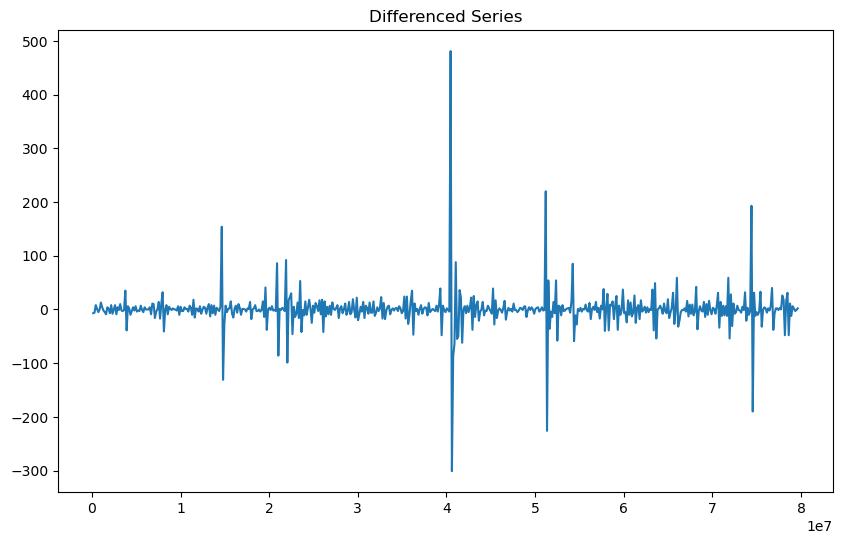

In [ ]:
# Apply differencing
single_page_views_diff = single_page_views.diff().dropna()

# Check stationarity again after differencing
check_stationarity(single_page_views_diff)

# Plot the differenced series
plt.figure(figsize=(10, 6))
plt.plot(single_page_views_diff)
plt.title('Differenced Series')
plt.show()


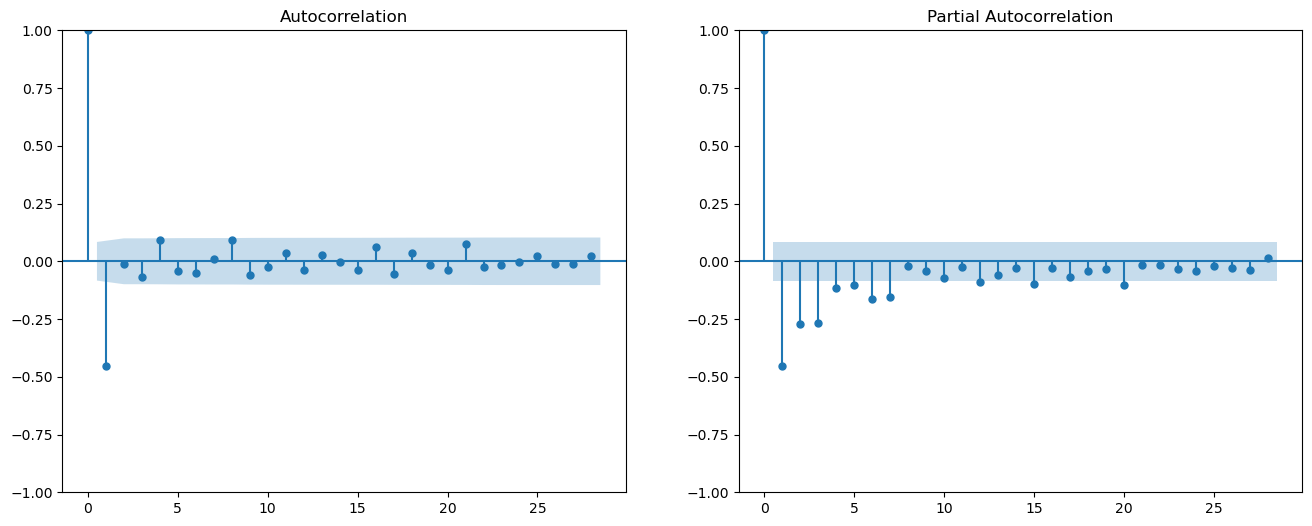

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
plot_acf(single_page_views_diff, ax=axes[0])
plot_pacf(single_page_views_diff, ax=axes[1])
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


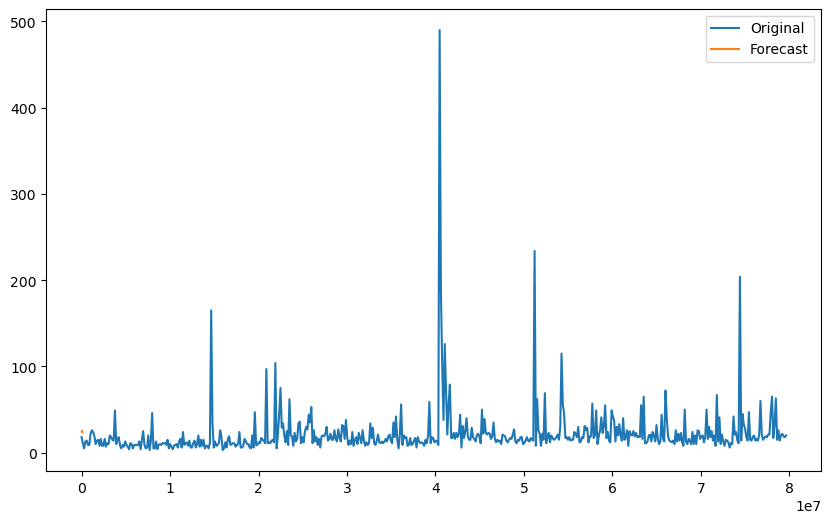

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
model = ARIMA(single_page_views, order=(1, 1, 1))
arima_result = model.fit()

# Forecast
forecast = arima_result.forecast(steps=30)
plt.figure(figsize=(10, 6))
plt.plot(single_page_views, label='Original')
plt.plot(forecast, label='Forecast')
plt.legend()
plt.show()


**Questionnaire Answers**
**1. Defining the problem statements and where can this and modifications of this be used?**

**Problem Statement:** The primary problem is to forecast the number of page views for Wikipedia articles to optimize ad placement. This involves transforming and analyzing time series data, making it stationary, and applying different forecasting models to make accurate predictions.
Applications:
Ad Placement Optimization: Forecasting views to place ads more effectively.
Content Management: Predicting popular content to manage and allocate resources.
User Engagement: Enhancing user experience by predicting trending topics.
Marketing Campaigns: Evaluating the impact of marketing campaigns on page views.

**2. Write 3 inferences you made from the data visualizations:**

**Inference 1:** Some pages have significantly higher view counts on specific dates, possibly due to external events or campaigns.
**Inference 2:** There is a seasonal pattern in the data, with certain periods showing higher activity.
**Inference 3:** The view counts for different pages can vary widely, indicating the necessity for page-specific models rather than a one-size-fits-all approach.

**3. What does the decomposition of series do?**

**Decomposition:** Decomposition breaks down a time series into its constituent components: trend, seasonal, and residual. This helps in understanding the underlying patterns and irregularities in the data, making it easier to model and forecast.

**4. What level of differencing gave you a stationary series?**

**Level of Differencing:** Typically, the first level of differencing (subtracting the previous observation) is used to achieve stationarity. However, this can vary based on the dataset, and additional differencing might be required.

**5. Difference between ARIMA, SARIMA & SARIMAX:**

**ARIMA (AutoRegressive Integrated Moving Average):** Captures the linear relationships in the data, differencing to make it stationary, and models the error terms.
SARIMA (Seasonal ARIMA): Extends ARIMA to handle seasonality by including seasonal terms in the model.
SARIMAX (Seasonal ARIMA with eXogenous variables): Incorporates external variables (exogenous) into the SARIMA model, allowing the model to account for external factors affecting the time series.

**6. Compare the number of views in different languages:**

**Comparison of Views:**
Pages in different languages exhibit distinct viewing patterns, often influenced by regional interests and events.
English pages generally have higher view counts, but other languages might show spikes during specific periods, reflecting localized events or campaigns.

**7. What other methods other than grid search would be suitable to get the model for all languages?**

**Alternative Methods:**
Random Search: A more efficient alternative to grid search, exploring a wider range of hyperparameters.
Bayesian Optimization: Uses probabilistic models to find the optimal parameters, often faster and more efficient.
Genetic Algorithms: Evolutionary algorithms that iteratively improve model parameters based on the concept of natural selection.